In [60]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

init_notebook_mode(connected=True)

cf.go_offline()

%matplotlib inline

df = pd.read_csv('/kaggle/input/montcoalert/911.csv')
df = df.fillna('None')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,None,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** What are the top 5 zipcodes for 911 calls? **

In [61]:
df['zip'].value_counts().head(5)

zip
None       80199
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
Name: count, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [62]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [63]:
df['title'].nunique()

148

** What is the most common Reason for a 911 call based off of this new column? **

In [64]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Reason'].value_counts()

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

📊 Distribution of 911 Calls by Reason
The bar chart below shows the three main reasons for 911 emergency calls:

Traffic 🚗 (Accidents, road incidents)
Fire 🔥 (Fires, hazardous situations)
EMS 🏥 (Medical emergencies)
From the graph, we can observe that EMS is the most frequent reason for 911 calls.

Understanding the distribution of 911 calls helps authorities allocate resources efficiently and improve emergency response times.

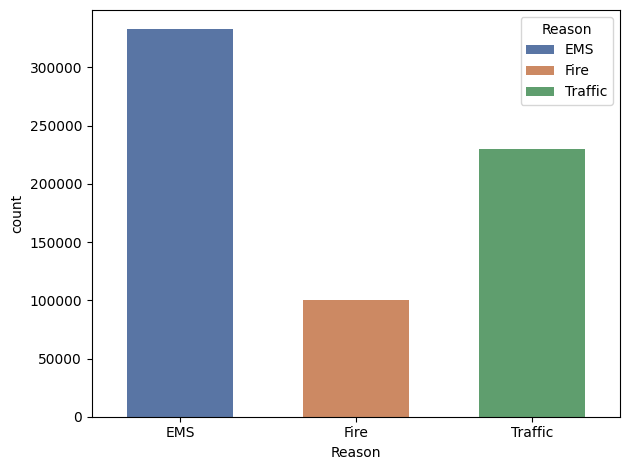

In [99]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
sns.countplot(x='Reason', hue='Reason', data=df, palette='deep', width=0.6, dodge=False)
plt.tight_layout()
plt.show()

** You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects. **



In [66]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week.

In [67]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

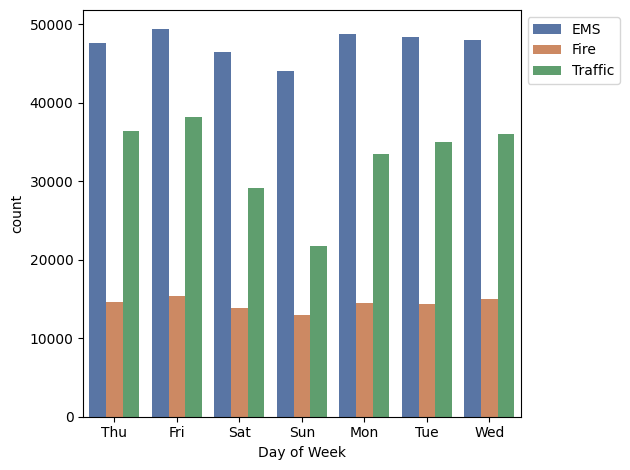

In [96]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='deep')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Now do the same for Month:

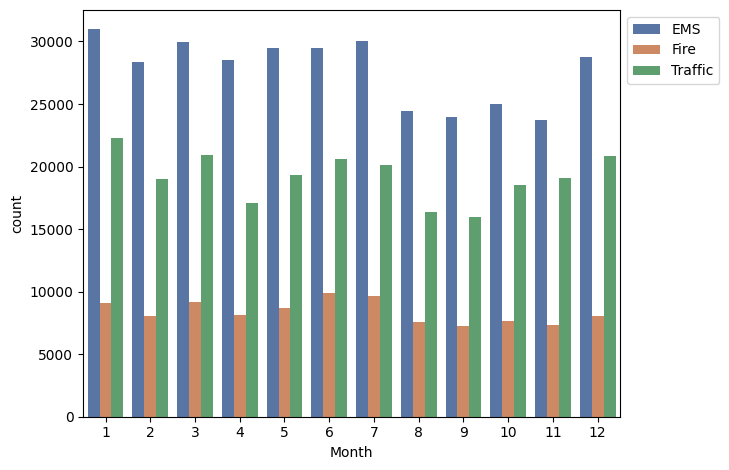

In [95]:
sns.countplot(x='Month',data=df,hue='Reason',palette='deep')
plt.tight_layout()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation.
Use the head() method on this returned DataFrame. **

In [70]:
byMonth = df.groupby(['Month']).count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,62336,62336,62336,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,55427,55427,55427,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,60027,60027,60027,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,53671,53671,53671,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,57509,57509,57509,57509,57509,57509,57509,57509,57509


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

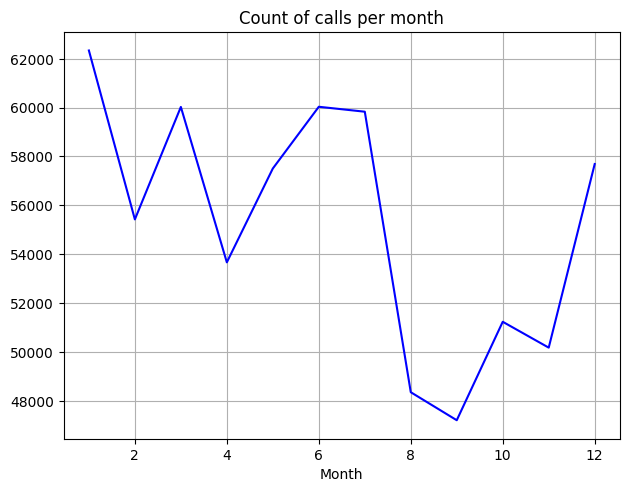

In [94]:
plt.plot(byMonth['Reason'],'b')
plt.grid()
plt.xlabel('Month')
plt.tight_layout()
plt.title('Count of calls per month')
plt.show()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month.**

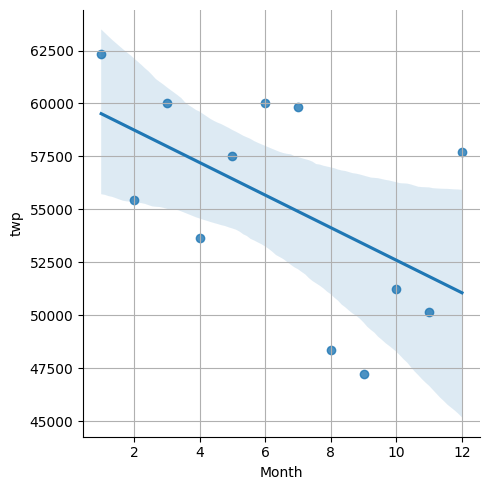

In [91]:
byMonth_reset = byMonth.reset_index()
byMonth_reset.head()
sns.lmplot(x='Month',y='twp', data=byMonth_reset)
plt.grid()
plt.tight_layout()
plt.show()

**Create a new column called 'Date' that contains the date from the timeStamp column.**

In [73]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

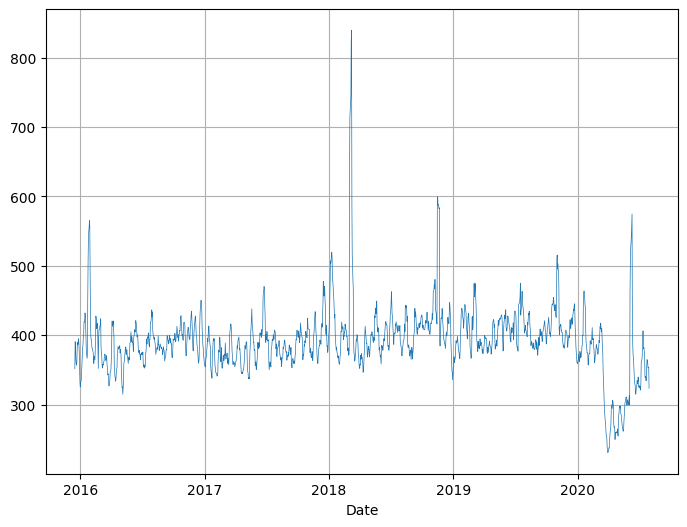

In [101]:
df_date = df.groupby(['Date']).count().rolling(7).mean()
df_date = df_date.reset_index()
plt.plot(df_date['Date'], df_date['Reason'], linewidth=0.5)
plt.xlabel('Date')
plt.grid()
plt.tight_layout(pad=-1)
plt.show()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

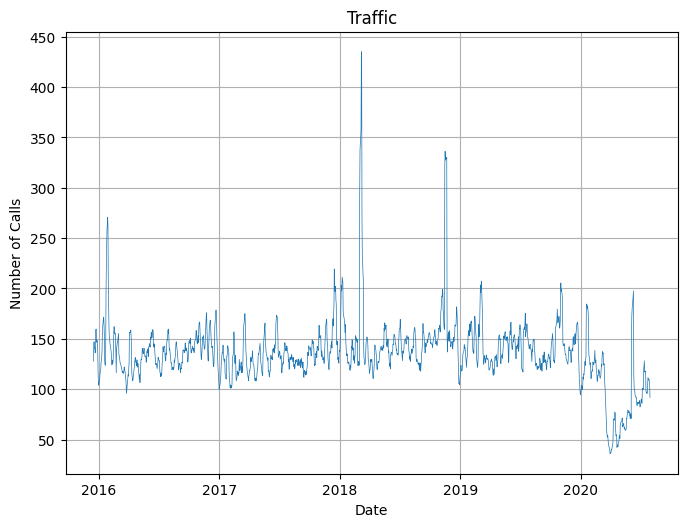

In [100]:
df_traffic = df[df['Reason']=='Traffic']
df_traffic.groupby(['Date']).count()['Reason'].rolling(7).mean().plot(linewidth=0.5)
plt.title('Traffic')
plt.ylabel('Number of Calls')
plt.tight_layout(pad=-1)
plt.grid()
plt.show()

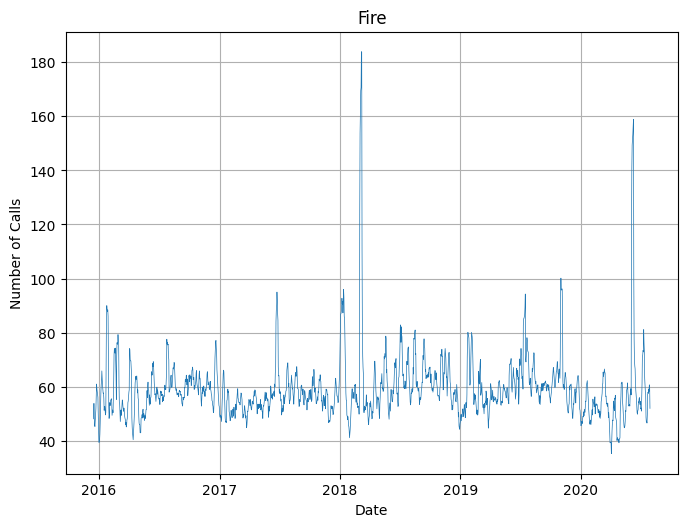

In [102]:
df_traffic = df[df['Reason']=='Fire']
df_traffic.groupby(['Date']).count()['Reason'].rolling(7).mean().plot(linewidth=0.5)
plt.title('Fire')
plt.ylabel('Number of Calls')
plt.tight_layout(pad=-1)
plt.grid()
plt.show()

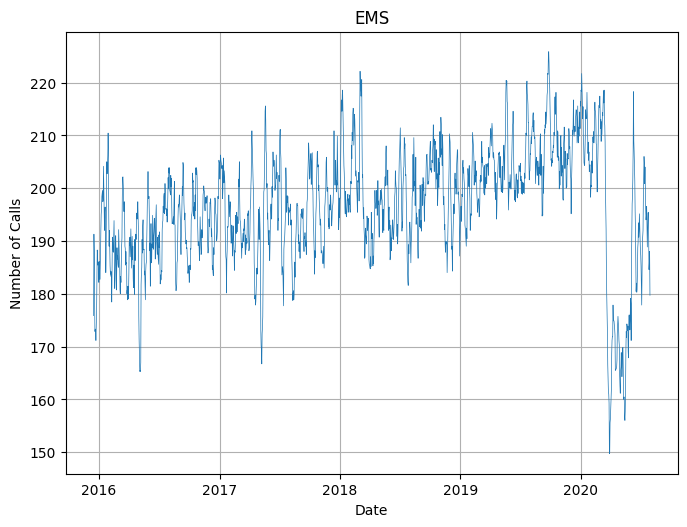

In [103]:
df_traffic = df[df['Reason']=='EMS']
df_traffic.groupby(['Date']).count()['Reason'].rolling(7).mean().plot(linewidth=0.5)
plt.title('EMS')
plt.ylabel('Number of Calls')
plt.tight_layout(pad=-1)
plt.grid()
plt.show()

Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [104]:
df_pivoting = df.pivot_table(index='Day of Week', values='twp',columns='Hour', aggfunc='count')
df_pivoting

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


** Now create a HeatMap using this new DataFrame. **

<Axes: xlabel='Hour', ylabel='Day of Week'>

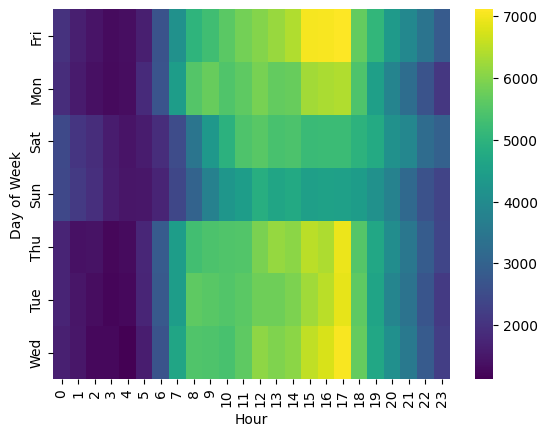

In [106]:
sns.heatmap(df_pivoting, cmap='viridis')

** Now create a clustermap using this DataFrame. **

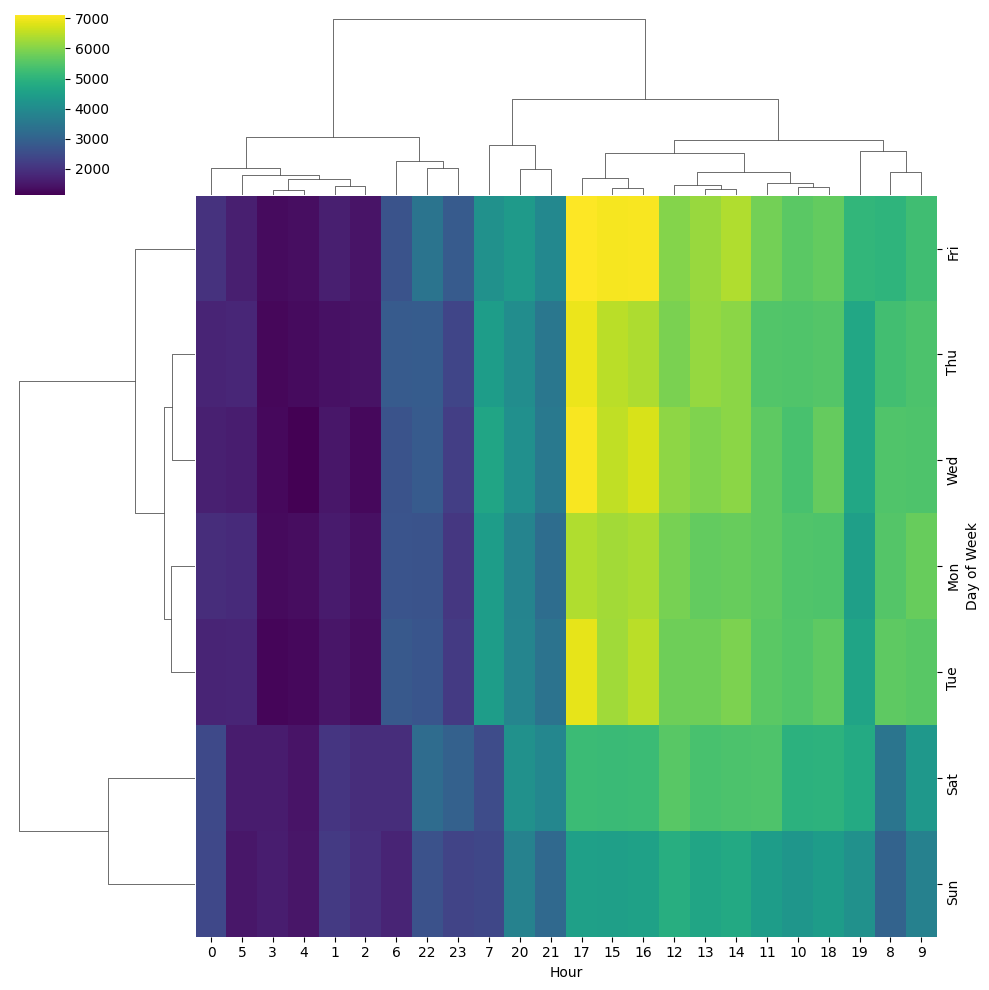

In [87]:
sns.clustermap(df_pivoting, cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [88]:
df_pivoting = df.pivot_table(index='Day of Week', values='twp',columns='Month', aggfunc='count')
df_pivoting

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


<Axes: xlabel='Month', ylabel='Day of Week'>

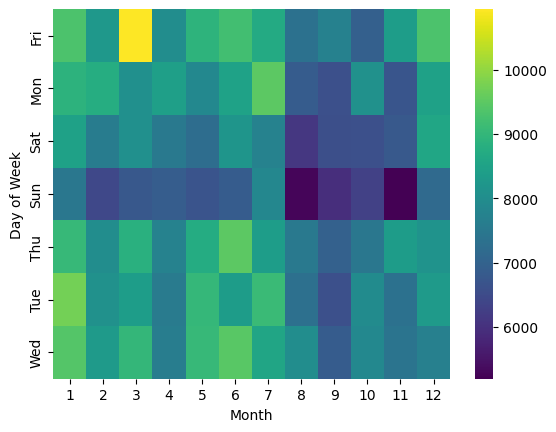

In [89]:
sns.heatmap(df_pivoting, cmap='viridis')

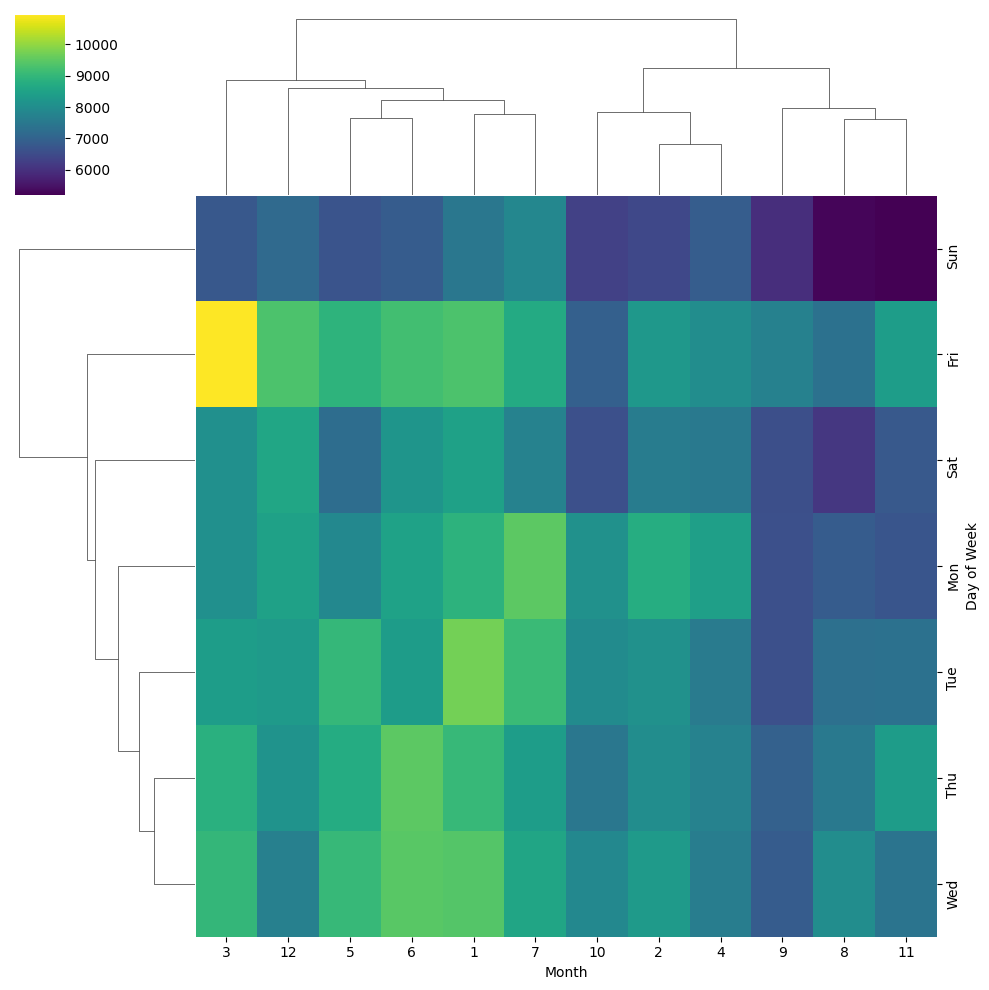

In [90]:
sns.clustermap(df_pivoting, cmap='viridis')